In [7]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head() # head() 메서드로 처음 5개의 샘플 확인
# 네 번째 열(class)은 타깃값으로 0이면 레드와인, 1이면 화이트 와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [8]:
wine.info() # 데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [9]:
wine.describe() # 열에 대한 간략한 통계(최소, 최대, 평균값) 출력

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [10]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # 판다스 데이터프레임을 넘파이 배열로 바꿈
target = wine['class'].to_numpy() # 훈련세트와 테스트 세트로 나눔

In [11]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)
# train_test_split() 함수는 설정값(test_size)을 지정하지 않으면 25%를 테스트 세트로 지정함

print(train_input.shape, test_input.shape) # 훈련세트와 테스트 세트의 크기 확인

(5197, 3) (1300, 3)


In [12]:
# StandardScaler 클래스를 사용해 데이터 스케일링
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
ss = StandardScaler()

# 훈련 세트에 대해 평균과 표준편차 계산
# fit() 메서드는 주어진 데이터(train_input)의 평균과 표준편차를 계산하여 이후 데이터의 스케일링 기준으로 사용
ss.fit(train_input)

# 훈련 세트를 표준화(스케일링)하여 train_scaled에 저장
# transform() 메서드는 fit()에서 계산된 평균과 표준편차를 사용해 데이터(train_input)를 스케일링 처리하여 모든 피처를 동일한 범위로 만듦
train_scaled = ss.transform(train_input)

# 테스트 세트도 같은 평균과 표준편차로 스케일링하여 test_scaled에 저장
# 테스트 세트는 훈련 세트로 계산된 기준을 그대로 적용받아야 하므로, fit()이 아닌 transform()만 사용해 스케일링
test_scaled = ss.transform(test_input)

In [13]:
# 표준점수로 변환된 train_scaled와 test_scaled를 사용해 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

# LogisticRegression 객체 생성
lr = LogisticRegression()

# 로지스틱 회귀 모델을 훈련 세트에 맞춰 훈련
# fit() 메서드는 표준화된 훈련 데이터(train_scaled)와 목표값(train_target)을 사용해 모델 학습
lr.fit(train_scaled, train_target)

# 훈련 세트 정확도 출력
# score() 메서드는 모델의 정확도를 반환
# train_scaled와 train_target을 사용해 훈련 세트에서의 성능 확인
print(lr.score(train_scaled, train_target))

# 테스트 세트 정확도 출력
# test_scaled와 test_target을 사용해 테스트 세트에서의 성능 확인
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [14]:
print(lr.coef_, lr.intercept_) # 로지스틱 회귀가 학습한 계수와 절편 출력

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


# 결정 트리(Decision Tree)

결정 트리는 데이터 분류 및 회귀 분석에 자주 사용되는 지도 학습 알고리즘 중 하나입니다. 이 알고리즘은 입력 데이터의 특성(feature)을 기준으로 여러 단계의 의사결정을 내려, 데이터를 특정 범주나 값으로 분류하는 트리 구조로 표현됩니다.

## 결정 트리의 구성 요소
1. **노드(Node)**: 결정 트리의 각 분기점입니다.
   - **루트 노드(Root Node)**: 트리의 맨 처음 시작하는 노드입니다.
   - **내부 노드(Internal Node)**: 특정 특성에 따라 데이터를 분할하는 중간 분기점입니다.
   - **리프 노드(Leaf Node)**: 최종 분류 결과나 예측 값을 나타내는 끝 노드입니다.

2. **분기(Branch)**: 노드를 연결하는 경로로, 데이터를 특성에 따라 분할하는 역할을 합니다.

## 결정 트리의 동작 원리
결정 트리는 데이터를 반복적으로 분할하여 최종 리프 노드에 도달할 때까지 진행합니다. 분할 기준을 설정할 때, 데이터의 **불순도(Impurity)** 가 낮아지도록 합니다. 일반적인 불순도 측정 지표로는 **지니 계수(Gini Impurity)** 와 **엔트로피(Entropy)** 가 있으며, 이를 통해 각 특성이 얼마나 데이터 분류에 효과적인지를 평가할 수 있습니다.

## 결정 트리의 학습 과정
1. **특성 선택**: 각 노드는 불순도를 최소화하는 특성으로 분할됩니다.
2. **분할**: 특성을 기준으로 데이터를 두 그룹으로 나누고, 이 과정이 트리의 깊이로 표현됩니다.
3. **반복**: 리프 노드에 도달할 때까지 분할 과정을 반복합니다.

## 장점
- **해석이 용이**: 트리 구조를 통해 분류 또는 예측의 기준을 쉽게 이해할 수 있습니다.
- **특성 스케일링 불필요**: 특성의 스케일에 민감하지 않아 전처리가 간단합니다.

## 단점
- **과적합(Overfitting)**: 트리가 너무 깊어지면 학습 데이터에 과적합될 수 있습니다.
- **불안정성**: 데이터가 조금만 변해도 트리 구조가 크게 변할 수 있습니다.

## 결정 트리의 개선 방법
과적합을 방지하기 위해 **가지치기(Pruning)** 를 적용하거나, **랜덤 포레스트(Random Forest)** 와 같은 앙상블 학습을 사용할 수 있습니다.

In [15]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier 객체 생성, 랜덤 시드 설정
dt = DecisionTreeClassifier(random_state=42)

# 결정 트리 모델을 훈련 세트에 맞춰 학습
dt.fit(train_scaled, train_target)

# 훈련 세트 정확도 출력
print(dt.score(train_scaled, train_target))

# 테스트 세트 정확도 출력
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


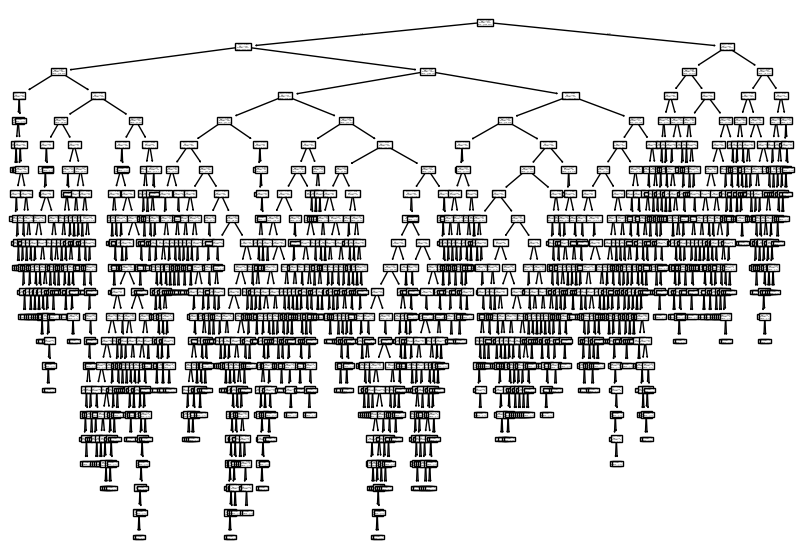

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 그래프의 크기 설정 (가로 10인치, 세로 7인치)
plt.figure(figsize=(10, 7))

# 결정 트리 시각화
plot_tree(dt)

# 그래프 출력
plt.show()

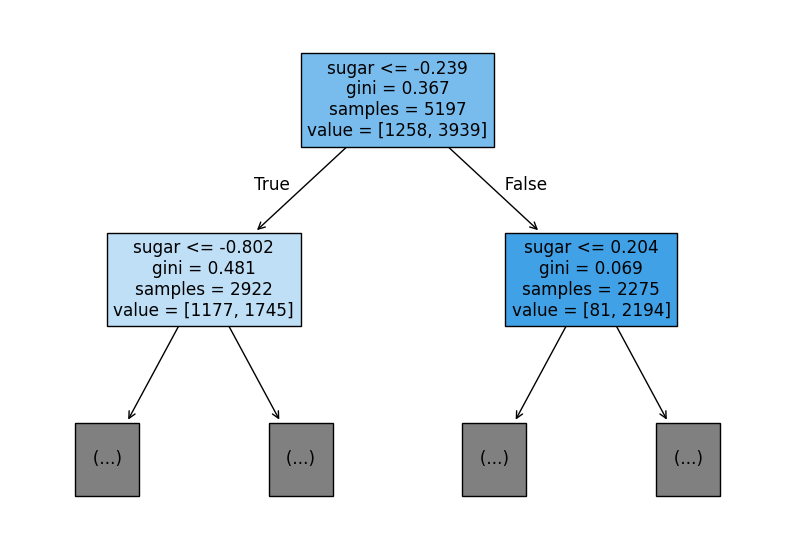

In [17]:
plt.figure(figsize=(10, 7))

# 결정 트리 시각화: 최대 깊이를 1로 설정하여 간단한 구조로 표시
# filled=True로 노드를 색상으로 채워 가독성 향상
# feature_names 매개변수에 특성 이름을 지정하여 시각화에 표시
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

# 그래프 출력
plt.show()

# 지니 불순도(Gini impurity)
- 정의: 지니 불순도는 특정 노드에 있는 데이터가 얼마나 섞여 있는지, 즉 서로 다른 클래스가 얼마나 섞여 있는지를 나타냄
- DecisionTreeClassifier 클래스의 criterion 매개변수(노드에서 데이터를 분할할 기준을 정하는 것)의 기본값
- 지니 불순도 = 1 - (음성클래스 비율^2 + 양성클래스 비율^2) 
- 지니 불순도가 0이면 노드가 완벽히 순수하다는 뜻으로, 해당 노드의 샘플들이 모두 같은 클래스에 속함
- 지니 불순도가 높을수록 다양한 클래스가 섞여 있는 상태
- 결정 트리에서 각 분할마다 지니 불순도가 가장 낮아지도록 데이터가 분할되어, 최종적으로 순수한 노드(한 클래스만 포함된 노드)에 가까운 트리를 만들어내는 것이 목표
# 정보이득(information gain)
-  부모의 불순도 - (왼쪽 노드 샘플 수/부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수/부모의 샘플 수) * 오른쪽 노드 불순도
# 결정 트리 예측 과정
- 새 샘플 예측 시, 트리의 각 노드에서 질문을 통해 이동하며, 마지막 노드의 클래스 비율을 바탕으로 예측.
- 결정 트리는 전처리 과정이 필요 없음
# 과적합과 가지치기 (Pruning)
- 제한 없이 트리가 자라면 훈련 세트에 과적합해 테스트 세트 성능이 저하될 수 있음.
- 일반화를 위해 트리 가지치기로 불필요한 노드를 제거.

In [19]:
# DecisionTreeClassifier 객체 생성, 최대 깊이를 3으로 설정하여 과적합 방지
# max_depth=3으로 설정해 루트 노드 아래로 최대 3개의 노드까지만 성장
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# 결정 트리 모델을 훈련 세트에 맞춰 학습
dt.fit(train_scaled, train_target)

# 훈련 세트 정확도 출력
print(dt.score(train_scaled, train_target))

# 테스트 세트 정확도 출력
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


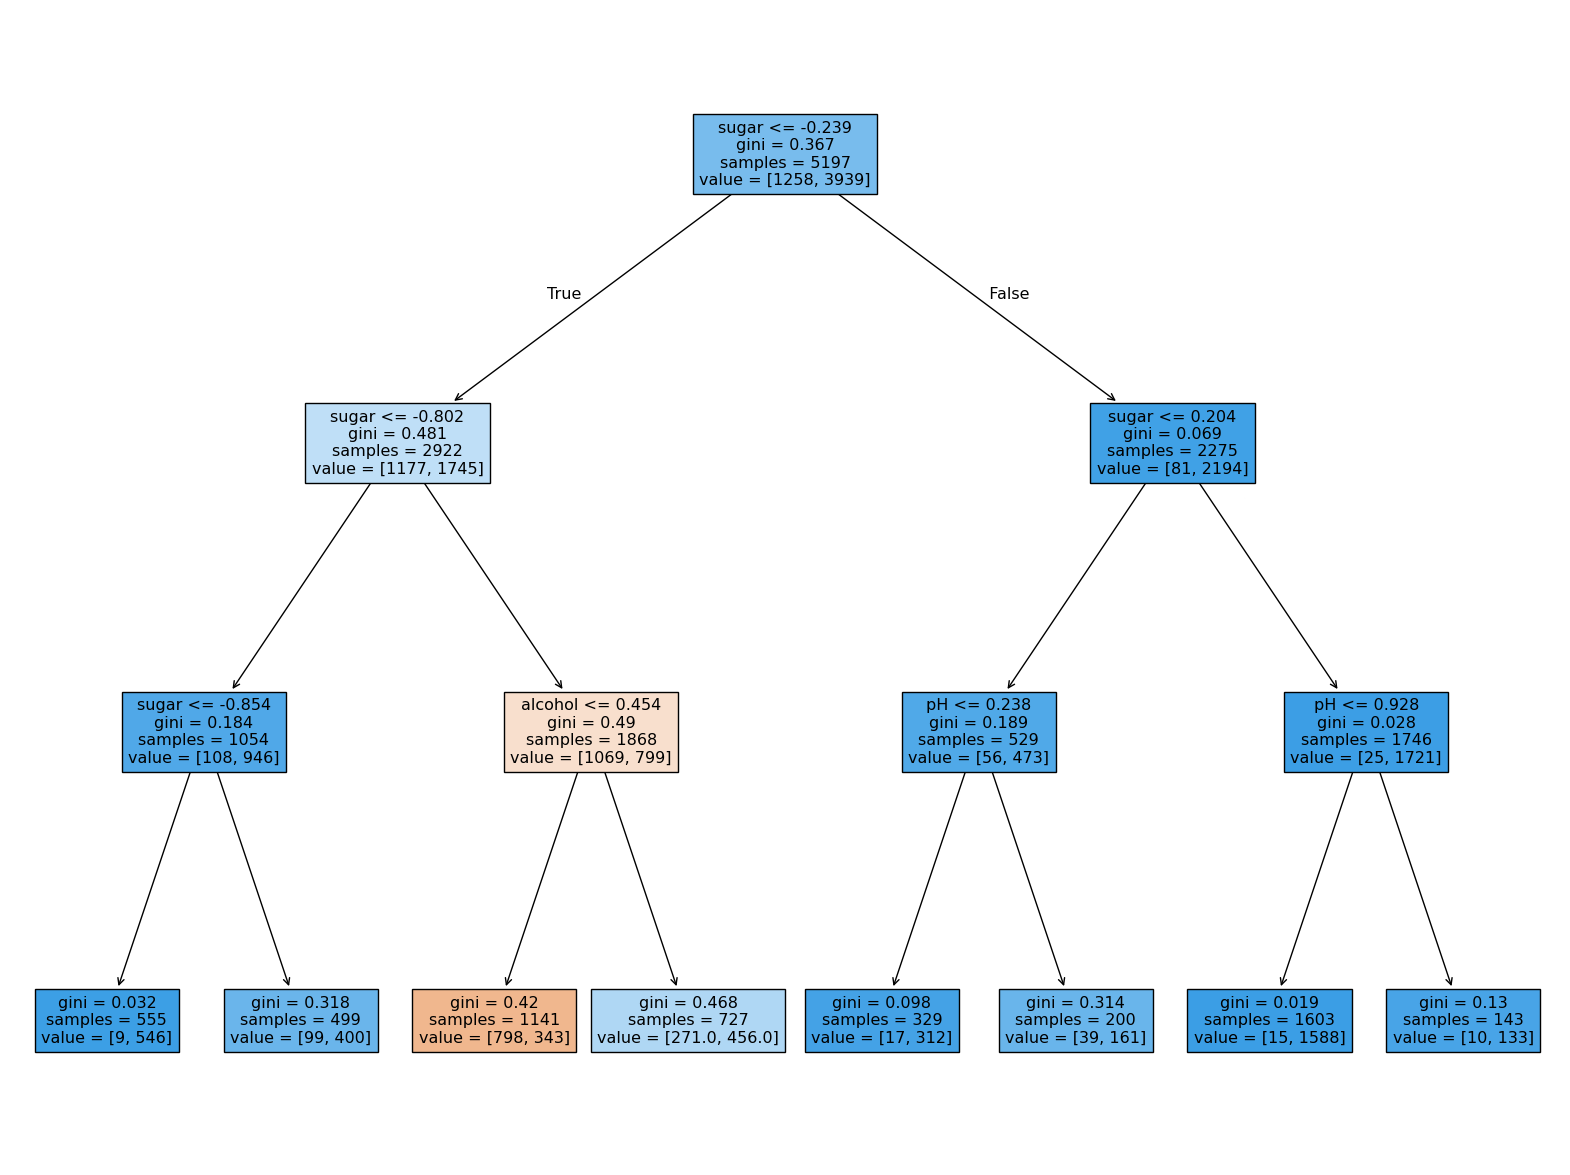

In [20]:
plt.figure(figsize=(20, 15))

# 결정 트리 시각화: 전체 트리 구조 표시
# filled=True로 노드 색상을 채워 가독성 향상
# feature_names에 특성 이름을 지정하여 시각화에 표시
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

# 그래프 출력
plt.show()

In [21]:
# 전처리 하기 전의 훈련세트와 테스트 세트로 결정 트리 모델 훈련
# max_depth=3으로 설정하여 트리가 과도하게 성장하지 않도록 제한
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# 결정 트리 모델을 전처리되지 않은 훈련 데이터에 맞춰 학습
dt.fit(train_input, train_target)

# 훈련 세트 정확도 출력
print(dt.score(train_input, train_target))

# 테스트 세트 정확도 출력
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


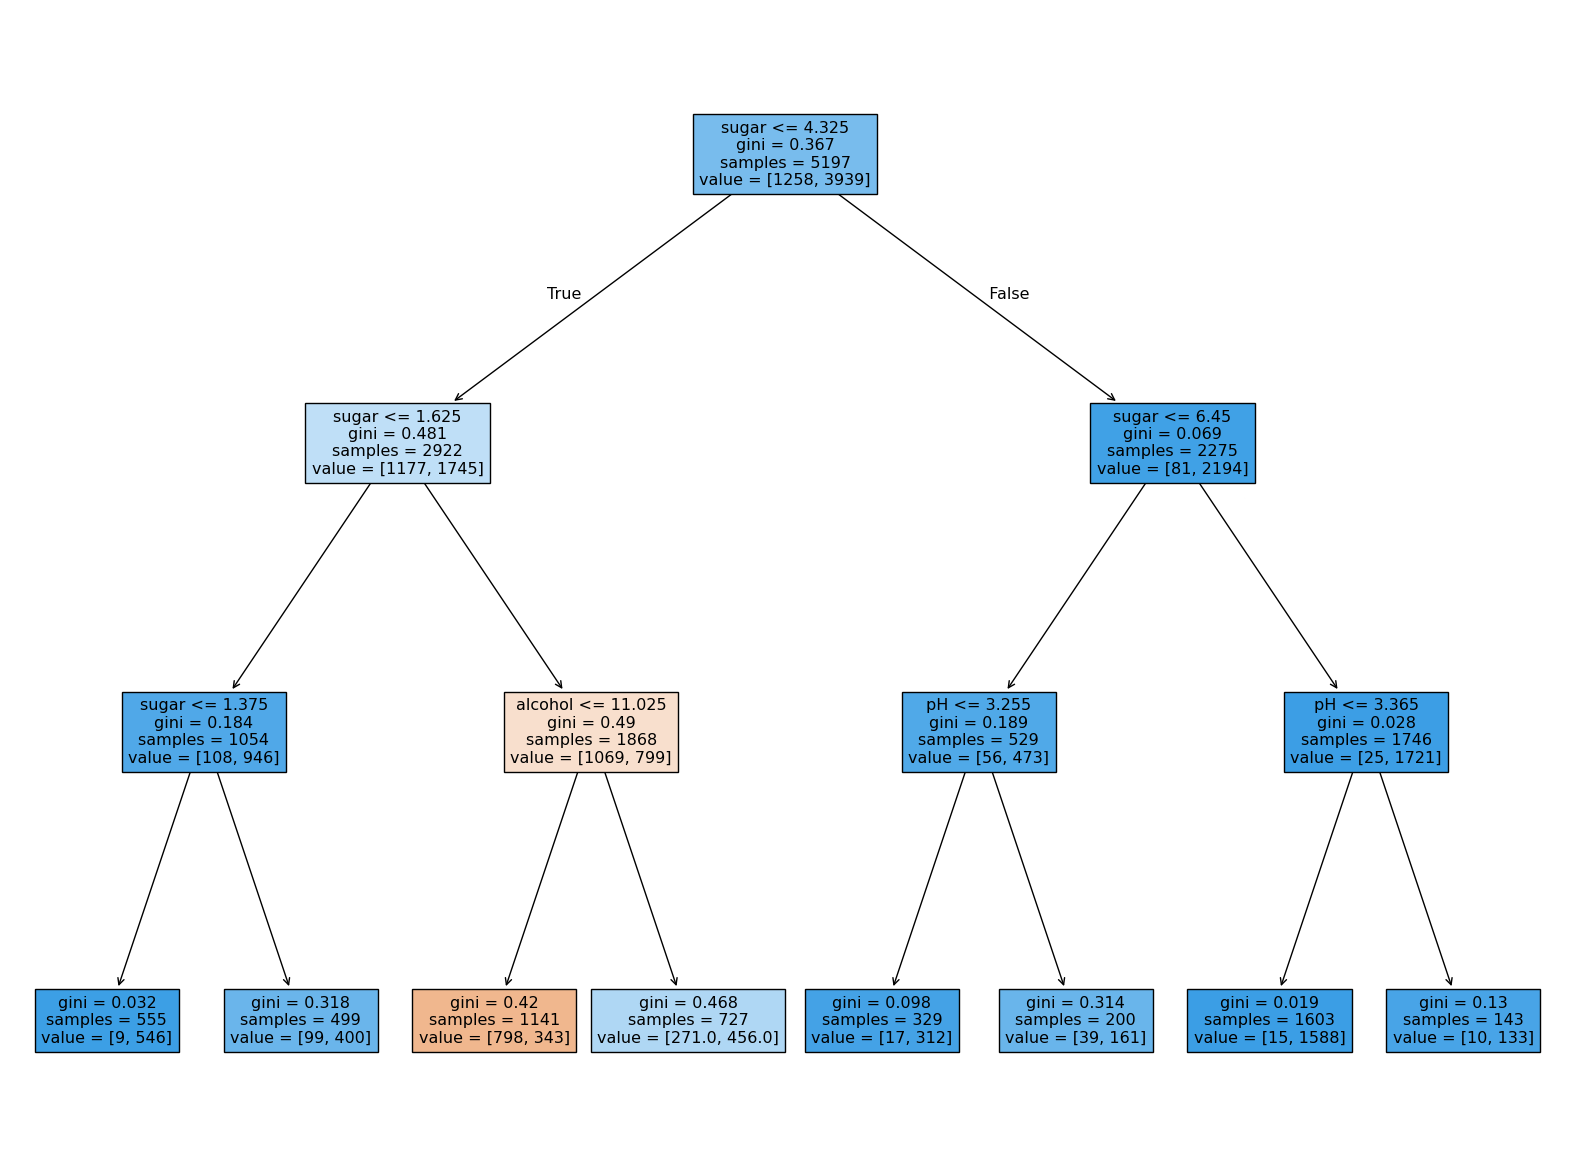

In [22]:
plt.figure(figsize=(20, 15))

# 결정 트리 시각화: 전체 트리 구조를 표시
# filled=True로 노드 색상을 채워 시각적 가독성 향상
# feature_names에 'alcohol', 'sugar', 'pH' 특성 이름을 지정하여 시각화에 표시
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

# 그래프 출력
plt.show()

In [25]:
print(dt.feature_importances_) # 특성 중요도 출력 -> 위 결정트리에서는 알코올 도수, 당도, pH 순으로 나옴, 중요도의 값을 모두 더하면 1

[0.12345626 0.86862934 0.0079144 ]
